# Netflix Data: Cleaning, Analysis and Visualization

## Step 0: Domain Knowledge

- Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents.
- This dataset is a cleaned version of the original version which can be found **[here](https://www.kaggle.com/datasets/shivamb/netflix-shows)**.
- The data consist of contents added to Netflix from 2008 to 2021.
- The oldest content is as old as 1925 and the newest as 2021.
- This dataset will be cleaned with PostgreSQL and visualized with Tableau.
- The purpose of this dataset is to test data cleaning and visualization skills.
- The Tableau dashboard can be found **[here](https://public.tableau.com/app/profile/abdulrasaq.ariyo/viz/NetflixTVShowsMovies_16615029026580/NetflixDashboard)**.

## Step 1: Ask Questions

- Counts of movies Vs. TV shows.
- Top ten directors.
- Top ten countries.
- Trends in show type over the years.
- Trends in average duration for movies duration over the years.
- Trends of average number of seasons for TV shows over the years.

## Step 2: Wrangle Data

### Set up the workspace

- Import necessary modules:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

- Create and set a customized color palette:

In [2]:
custom_palette = ['#118ab2', '#ef476f', '#06d6a0', '#ffd166', '#073b4c']
sns.set_palette(custom_palette)
sns.color_palette()

[(0.06666666666666667, 0.5411764705882353, 0.6980392156862745),
 (0.9372549019607843, 0.2784313725490196, 0.43529411764705883),
 (0.023529411764705882, 0.8392156862745098, 0.6274509803921569),
 (1.0, 0.8196078431372549, 0.4),
 (0.027450980392156862, 0.23137254901960785, 0.2980392156862745)]

- Define the main colors:

In [3]:
blue, red, green, yellow, blue_black = custom_palette

### Load the data

- Read the data:

In [4]:
netflix = pd.read_csv("netflix.csv")

### Assess and clean the data

- Explore the data shape:

In [5]:
netflix.shape

(8790, 10)

- Explore the firt few raws:

In [6]:
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


- Check for column names, missing values, dtypes and more:

In [7]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


- View some stats:

In [8]:
netflix.describe(datetime_is_numeric=True).T

,count,mean,std,min,25%,50%,75%,max
release_year,8790.0,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0


### Get the data ready for EDA

- Convert `date_added` to datetime:

In [9]:
netflix["date_added"] = pd.to_datetime(netflix["date_added"], format="%m/%d/%Y")
netflix["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

- Add `year_released` as a new datetime column:

In [10]:
netflix["year_released"] = pd.to_datetime(netflix["release_year"], format="%Y")
netflix["year_released"].head()

0   2020-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   1993-01-01
Name: year_released, dtype: datetime64[ns]

- Add `year_released_cat` as a new categorical column:

In [11]:
netflix["year_released_cat"] = netflix["release_year"].astype("category")
netflix["year_released_cat"].head()

0    2020
1    2021
2    2021
3    2021
4    1993
Name: year_released_cat, dtype: category
Categories (74, int64): [1925, 1942, 1943, 1944, ..., 2018, 2019, 2020, 2021]

- Drop `release_year` column:

In [12]:
netflix.drop(columns="release_year", inplace=True)
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'rating', 'duration', 'listed_in', 'year_released',
       'year_released_cat'],
      dtype='object')

- Check the data cardinality:

In [13]:
netflix.nunique().sort_values()

type                    2
rating                 14
year_released          74
year_released_cat      74
country                86
duration              220
listed_in             513
date_added           1713
director             4528
title                8787
show_id              8790
dtype: int64

- Some columns are good candidates for categorical encoding:

In [14]:
cat_cols = ["type", "rating", "country"]
netflix[cat_cols] = netflix[cat_cols].astype("category")

- `.head()`, `.info()` and `.describe()` REVISITED:

In [15]:
netflix.head()

,show_id,type,title,director,country,date_added,rating,duration,listed_in,year_released,year_released_cat
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90 min,Documentaries,2020-01-01,2020
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021-01-01,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021-01-01,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91 min,"Children & Family Movies, Comedies",2021-01-01,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125 min,"Dramas, Independent Movies, International Movies",1993-01-01,1993


In [16]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   show_id            8790 non-null   object        
 1   type               8790 non-null   category      
 2   title              8790 non-null   object        
 3   director           8790 non-null   object        
 4   country            8790 non-null   category      
 5   date_added         8790 non-null   datetime64[ns]
 6   rating             8790 non-null   category      
 7   duration           8790 non-null   object        
 8   listed_in          8790 non-null   object        
 9   year_released      8790 non-null   datetime64[ns]
 10  year_released_cat  8790 non-null   category      
dtypes: category(4), datetime64[ns](2), object(5)
memory usage: 521.3+ KB


In [17]:
netflix.describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
date_added,8790,2019-05-17 21:44:01.638225408,2008-01-01,2018-04-06,2019-07-03,2020-08-19 18:00:00,2021-09-25
year_released,8790,2014-03-08 18:26:56.928327680,1925-01-01,2013-01-01,2017-01-01,2019-01-01 00:00:00,2021-01-01


## Step 3: Perform EDA (Exploratory Data Analysis)

- Explore the proportions of movies and TV shows:

In [18]:
# Define a function to replace tick numbers with proportions:
def normalize_ticks(data, col, step=0.1):
    
    """replace tick numbers with proportions."""
    
    max_prop = data[col].value_counts(normalize=True)[0]
        
    new_ticks = np.arange(0, max_prop + step, step)
    new_tick_pos = new_ticks * len(data)
    new_tick_labels = [str(t)[:3] for t in new_ticks]
    
    return new_tick_pos, new_tick_labels

In [19]:
pos, labs = normalize_ticks(data=netflix, col='type')

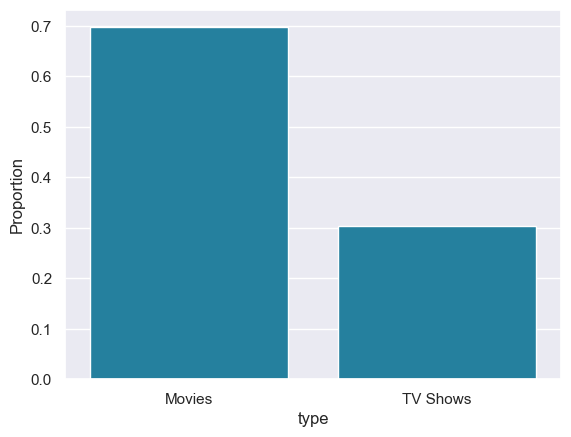

In [20]:
ax = sns.countplot(data=netflix, x='type', color=blue)
ax.set_xticklabels(labels=['Movies', 'TV Shows'])
ax.set_ylabel('Proportion')
ax.set_yticks(pos)
ax.set_yticklabels(labs);

- Explore the top ten directors according to the number of movies/TV shows:

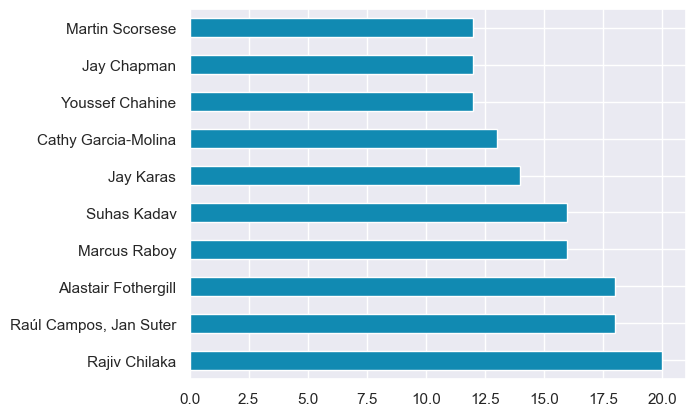

In [21]:
netflix.query("director != 'Not Given'")["director"].value_counts().head(10).plot.barh();

- Explore the top ten countries according to the number of movies/TV shows:

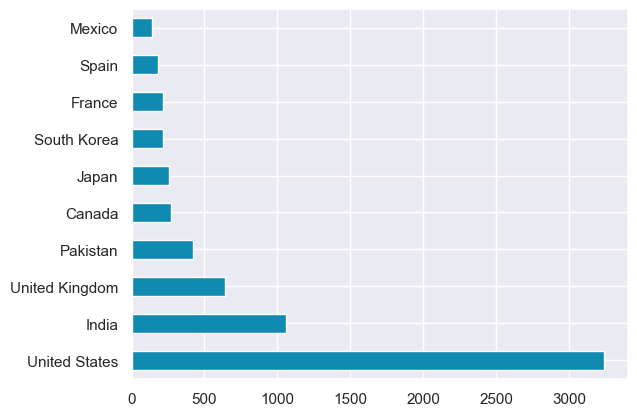

In [22]:
netflix.query("country != 'Not Given'")["country"].value_counts().head(10).plot.barh(color=blue);

In [23]:
grouped_by_release_year_and_type = netflix.groupby(by=["year_released_cat", "type"])[["type"]].count()
grouped_by_release_year_and_type.head()

type
year_released_cat type         
1925              Movie       0
                  TV Show     1
1942              Movie       2
                  TV Show     0
1943              Movie       3

In [24]:
grouped_by_release_year_and_type.rename(columns={"type": "counts"}, inplace=True)
grouped_by_release_year_and_type.reset_index(level="type", inplace=True)

In [25]:
grouped_by_release_year_and_type.head()

,type,counts
year_released_cat,,
1925,Movie,0
1925,TV Show,1
1942,Movie,2
1942,TV Show,0
1943,Movie,3


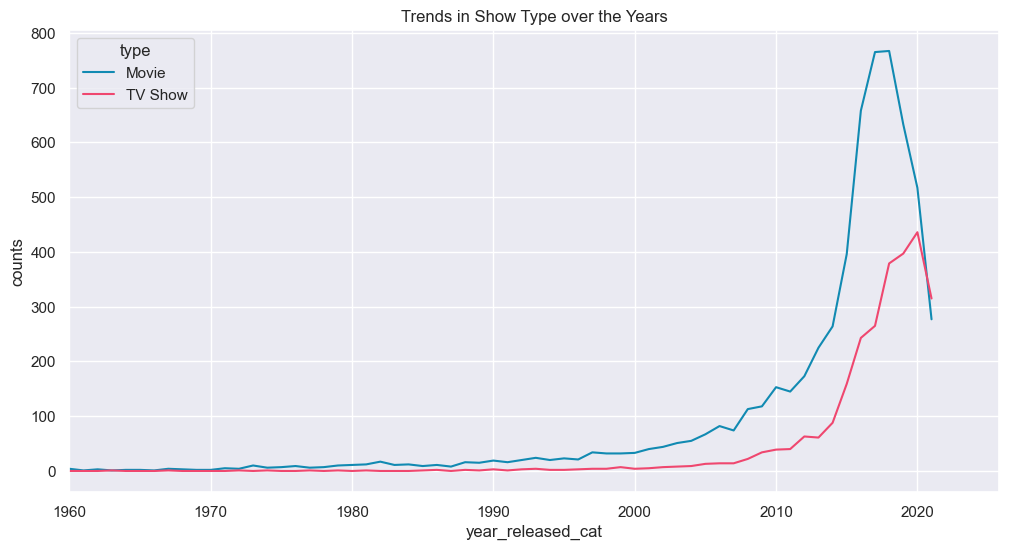

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=grouped_by_release_year_and_type, x="year_released_cat", y="counts", hue="type", ax=ax)
ax.set_xlim(left=1960)
ax.set_title("Trends in Show Type over the Years");

- Create a seperate DataFrame for TV shows:

In [27]:
netflix_tv_shows = netflix.query("type == 'TV Show'").copy()
netflix_tv_shows["seasons"] = netflix_tv_shows["duration"].apply(lambda x: int(x[:-7]))
netflix_tv_shows.drop(columns=["type", "duration"], inplace=True)
netflix_tv_shows.head()

,show_id,title,director,country,date_added,rating,listed_in,year_released,year_released_cat,seasons
1,s3,Ganglands,Julien Leclercq,France,2021-09-24,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",2021-01-01,2021,1
2,s6,Midnight Mass,Mike Flanagan,United States,2021-09-24,TV-MA,"TV Dramas, TV Horror, TV Mysteries",2021-01-01,2021,1
5,s9,The Great British Baking Show,Andy Devonshire,United Kingdom,2021-09-24,TV-14,"British TV Shows, Reality TV",2021-01-01,2021,9
17,s4,Jailbirds New Orleans,Not Given,Pakistan,2021-09-24,TV-MA,"Docuseries, Reality TV",2021-01-01,2021,1
18,s15,Crime Stories: India Detectives,Not Given,Pakistan,2021-09-22,TV-MA,"British TV Shows, Crime TV Shows, Docuseries",2021-01-01,2021,1


- Explore the percentage of different ratings (TV shows):

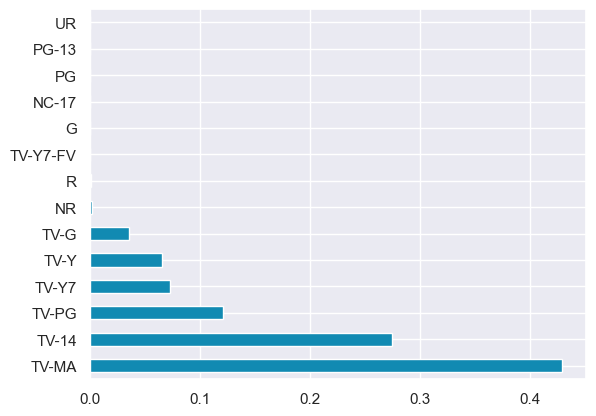

In [28]:
netflix_tv_shows["rating"].value_counts(normalize=True).plot.barh();

- Explore the trends in average TV show duration:

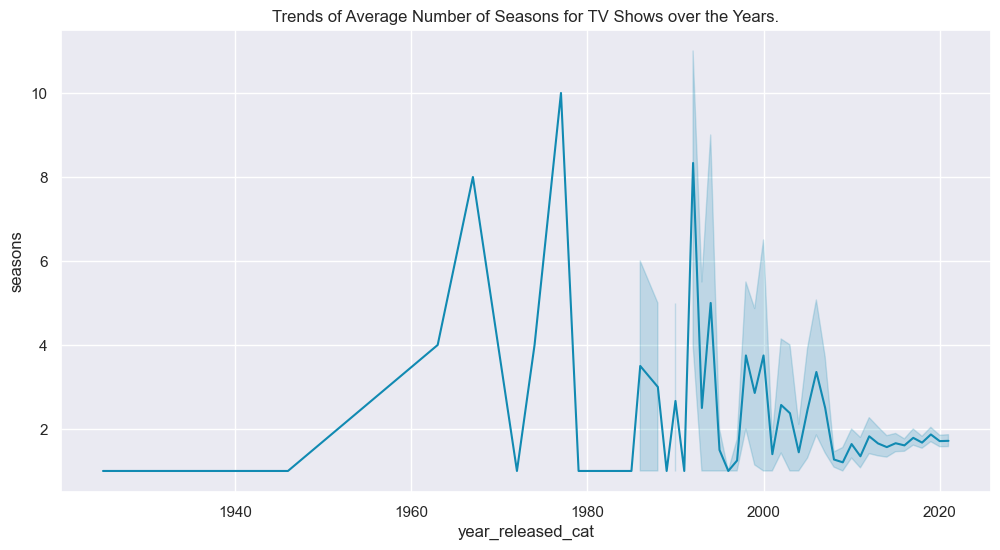

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=netflix_tv_shows, x="year_released_cat", y="seasons", ax=ax)
ax.set_title("Trends of Average Number of Seasons for TV Shows over the Years.");

- Create a seperate DataFrame for movies:

In [30]:
netflix_movies = netflix.query("type == 'Movie'").copy()
netflix_movies["duration"] = netflix_movies["duration"].apply(lambda x: int(x[:-4]))
netflix_movies.drop(columns=["type"], inplace=True)
netflix_movies.head()

,show_id,title,director,country,date_added,rating,duration,listed_in,year_released,year_released_cat
0,s1,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,PG-13,90,Documentaries,2020-01-01,2020
3,s14,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,TV-PG,91,"Children & Family Movies, Comedies",2021-01-01,2021
4,s8,Sankofa,Haile Gerima,United States,2021-09-24,TV-MA,125,"Dramas, Independent Movies, International Movies",1993-01-01,1993
6,s10,The Starling,Theodore Melfi,United States,2021-09-24,PG-13,104,"Comedies, Dramas",2021-01-01,2021
7,s939,Motu Patlu in the Game of Zones,Suhas Kadav,India,2021-05-01,TV-Y7,87,"Children & Family Movies, Comedies, Music & Mu...",2019-01-01,2019


- Explore the percentage of different ratings (movies):

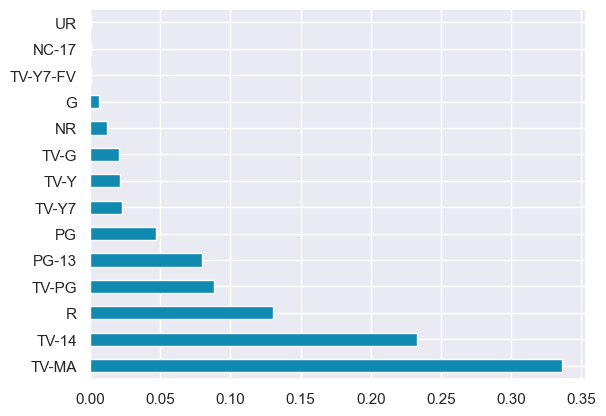

In [31]:
netflix_movies["rating"].value_counts(normalize=True).plot.barh();

- Explore the trends in average movie duration:

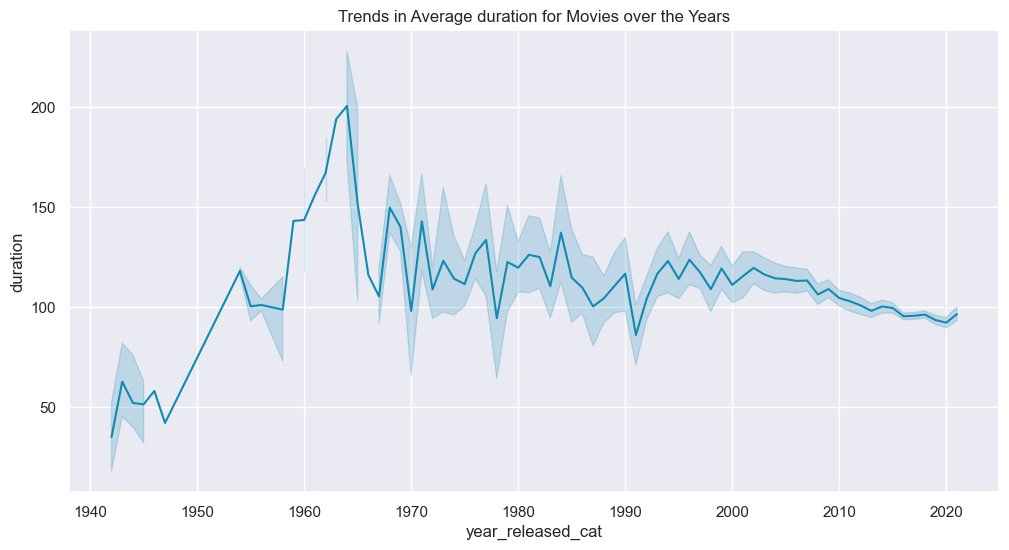

In [32]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=netflix_movies, x="year_released_cat", y="duration", ax=ax)
ax.set_title("Trends in Average duration for Movies over the Years");

## Step 4: Draw Conclusions

- Proportion of movies Vs. TV shows (about 70% to 30% respectively).
- Top ten directors:
> - Rajiv Chilaka --> 20
> - Raúl Campos, Jan Suter --> 18
> - Alastair Fothergill --> 18
> - Marcus Raboy --> 16
> - Suhas Kadav --> 16
> - Jay Karas --> 14
> - Cathy Garcia-Molina --> 13
> - Youssef Chahine --> 12
> - Jay Chapman --> 12
> - Martin Scorsese --> 12
- Top ten countries:
> - United States --> 3240
> - India --> 1057
> - United Kingdom --> 638
> - Pakistan --> 421
> - Canada --> 271
> - Japan --> 259
> - South Korea --> 214
> - France --> 213
> - Spain --> 182
> - Mexico --> 138
- Trends in show type over the years: there was a constant increase in show counts (movies > TV shoes) starting from around 2000, peaking at around 2018, and then gradually declining.
- Proportions of different TV shows ratings: less than around 20% of the shows are suitable for kids `<=` the age of 7 years.
- Trends of average number of seasons for TV shows over the years: the plot showed a great variation with no constant pattern.
- Proportions of different TV shows ratings: less than around 10% of the shows are suitable for kids `<=` the age of 7 years.
- Trends in average duration for movies duration over the years: the plot showed some variation from 70's to 90's.